In [18]:
import selenium
from selenium import webdriver
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import re
import time
import json

options = Options()
options.add_argument('--headless')
options.add_argument('--disable-gpu')

# donjon

In [55]:
def main(url):
    '''add card data to list'''
    all_items = []
    
    driver = webdriver.Chrome(options=options)
    driver.get(url)

    all_rows = driver.find_elements_by_xpath("//tr")

    for row in all_rows[4:]:
        item_dict = {}
        row_html = row.get_attribute('innerHTML')[4:-5]
        split = row_html.split('</td><td>')
        item_dict = {'item':split[0],'type':split[1],
                     'rarity':split[2],'attunement':split[3],
                     'notes':split[4],'source':split[5]}
        all_items.append(item_dict)
        
    driver.quit()
    
    return all_items
    
        
url = 'https://donjon.bin.sh/5e/magic_items/'
item_list = main(url)
print(item_list)

[{'item': 'Armor of Gleaming', 'type': 'Armor', 'rarity': 'Common', 'attunement': '', 'notes': 'medium or heavy', 'source': 'xge 136'}, {'item': 'Cast-Off Armor', 'type': 'Armor', 'rarity': 'Common', 'attunement': '', 'notes': 'light, medium, or heavy', 'source': 'xge 136'}, {'item': 'Shield of Expression', 'type': 'Armor', 'rarity': 'Common', 'attunement': '', 'notes': 'shield', 'source': 'xge 139'}, {'item': 'Smoldering Armor', 'type': 'Armor', 'rarity': 'Common', 'attunement': '', 'notes': '', 'source': 'xge 139'}, {'item': 'Adamantine Armor', 'type': 'Armor', 'rarity': 'Uncommon', 'attunement': '', 'notes': 'medium or heavy, but not hide', 'source': 'dmg 150'}, {'item': "Mariner's Armor", 'type': 'Armor', 'rarity': 'Uncommon', 'attunement': '', 'notes': '', 'source': 'dmg 181'}, {'item': 'Mithral Armor', 'type': 'Armor', 'rarity': 'Uncommon', 'attunement': '', 'notes': 'medium or heavy, but not hide', 'source': 'dmg 182'}, {'item': 'Sentinel Shield', 'type': 'Armor', 'rarity': 'Unc

In [56]:
df = pd.DataFrame(item_list)
df

,item,type,rarity,attunement,notes,source
0,Armor of Gleaming,Armor,Common,,medium or heavy,xge 136
1,Cast-Off Armor,Armor,Common,,"light, medium, or heavy",xge 136
2,Shield of Expression,Armor,Common,,shield,xge 139
3,Smoldering Armor,Armor,Common,,,xge 139
4,Adamantine Armor,Armor,Uncommon,,"medium or heavy, but not hide",dmg 150
...,...,...,...,...,...,...
449,Crook of Rao,Wondrous Item,Artifact,yes,,tce 123
450,Demonomicon of Iggwilv,Wondrous Item,Artifact,yes,,tce 125
451,Luba's Tarokka of Souls,Wondrous Item,Artifact,yes,,tce 129
452,Mighty Servant of Leuk-o,Wondrous Item,Artifact,yes,,tce 131


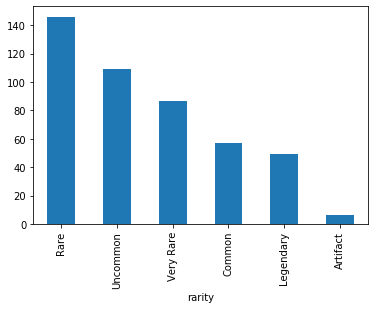

In [63]:
df.groupby('rarity').size().sort_values(ascending=False).plot.bar()

# roll

In [22]:
def main(url):
    '''open all expansion tabs and add data to list'''
    print('SETTING UP DRIVER....')
    driver = webdriver.Chrome(options=options)
    driver.get(url)    
    time.sleep(5)
    print('Done.\n------')
    print('OPENING DROPDOWNS....')
    buttons = driver.find_elements_by_class_name('dropdown-toggle')
    with tqdm(total=len(buttons)) as pbar:    
        for button in buttons[7:]:
            time.sleep(.5)
            driver.execute_script("arguments[0].click();", button)
            pbar.update(1)
    print('Done.\n------')
    print('FINDING CARD ELEMENTS....')
    item_list = [item.text for item in driver.find_elements_by_class_name('card')]
    print('Done.\n\n')
    return item_list
    
url = 'https://roll20.net/compendium/dnd5e/Items%20List#content'
item_list = main(url)
print(item_list)

SETTING UP DRIVER....
Done.

------


OPENING DROPDOWNS....



Done.

------


FINDING CARD ELEMENTS....
Done.


['Abacus\nadventuring gear\nCategory: Items\nWeight: 2', 'Acid\nadventuring gear (consumable)\nCategory: Items\nDamage: 2d6\nDamage Type: Acid\nProperties: Improvised Weapons\nRange: 20/60\nWeight: 1', 'Adamantine Armor\narmor (medium or heavy, but not hide)\nCategory: Items', "Alchemist'S Fire\nadventuring gear (consumable)\nCategory: Items\nDamage: 1d4\nDamage Type: Fire\nProperties: Improvised Weapons\nRange: 20/60\nSave: Dexterity\nWeight: 1", "Alchemist'S Supplies\nadventuring gear (artisan's tools)\nCategory: Items\nItem Rarity: Standard\nWeight: 8", 'Amulet\nadventuring gear (neck)\nCategory: Items\nWeight: 1', 'Amulet Of Health\nadventuring gear (wondrous item, neck)\nCategory: Items\nItem Rarity: Rare\nModifiers: Constitution: 19\nWeight: 1', 'Amulet Of Proof Against Detection And Location\nadventuring gear (wondrous item, neck)\nCategory: Items\nItem Rarity: Uncommon', 'Amulet Of The Planes\nadventuring gear (wondrous item, n

In [41]:
all_items = []
for item in item_list:
    item_dict = {}
    split = item.split('\n')
    item_dict['item'] = split[0]
    item_dict['type'] = split[1]
    if split[1] == '(equipment pack)':
        item_dict['pack_contents'] = split[4]
    else:        
        item_dict['pack_contents'] = ''
    for x in split[2:]:
        if 'Weight:' in x:
            item_dict['weight'] = x.split('Weight: ')[1]
        else:
            item_dict['weight'] = ''
        if 'Item Rarity:' in x:
            item_dict['rarity'] = x.split('Item Rarity: ')[1]            
        else:
            item_dict['rarity'] = '' 
        if 'Modifiers:' in x:
            item_dict['modifiers'] = x.split('Modifiers: ')[1]
        else:
            item_dict['modifiers'] = ''
        if 'AC:' in x:
            item_dict['ac'] = x.split('AC: ')[1]
        else:
            item_dict['ac'] = ''
        if 'Save:' in x:
            item_dict['save'] = x.split('Save: ')[1]
        else:
            item_dict['save'] = ''   
        if 'Stealth:' in x:
            item_dict['stealth'] = x.split('Stealth: ')[1]
        else:
            item_dict['stealth'] = ''   
        if 'Damage:' in x:
            item_dict['damage'] = x.split('Damage: ')[1]
        else:
            item_dict['damage'] = ''  
        if 'Damage Type:' in x:
            item_dict['damage_type'] = x.split('Damage Type: ')[1]
        else:
            item_dict['damage_type'] = ''  
        if 'Duration:' in x:
            item_dict['duration'] = x.split('Duration: ')[1]
        else:
            item_dict['duration'] = ''  
        if 'Secondary Damage:' in x:
            item_dict['secondary_damage'] = x.split('Secondary Damage: ')[1]
        else:
            item_dict['secondary_damage'] = ''  
        if 'Range:' in x:
            item_dict['range'] = x.split('Range: ')[1]
        else:
            item_dict['range'] = ''  
        if 'Properties:' in x:
            item_dict['properties'] = x.split('Properties: ')[1]
        else:
            item_dict['properties'] = ''  
    all_items.append(item_dict)
    
df = pd.DataFrame(all_items)
df = df.applymap(lambda s:s.lower() if type(s) == str else s)
df

,item,type,pack_contents,weight,rarity,modifiers,ac,save,stealth,damage,damage_type,duration,secondary_damage,range,properties
0,abacus,adventuring gear,,2,,,,,,,,,,,
1,acid,adventuring gear (consumable),,1,,,,,,,,,,,
2,adamantine armor,"armor (medium or heavy, but not hide)",,,,,,,,,,,,,
3,alchemist's fire,adventuring gear (consumable),,1,,,,,,,,,,,
4,alchemist's supplies,adventuring gear (artisan's tools),,8,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,woodcarver's tools,adventuring gear (artisan's tools),,5,,,,,,,,,,,
768,wooden shield,shield (shield),,6,,,,,,,,,,,
769,wooden staff,adventuring gear (arcane focus),,4,,,,,,,,,,,
770,yew wand,adventuring gear (druidic focus),,1,,,,,,,,,,,


In [42]:
df.to_csv('../output/roll_20_items')